<a href="https://colab.research.google.com/github/git-shashank-hp/Algorithm-Notes-in-Pyhton/blob/main/CCFD_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/CCDP/fraudTrain.csv'

In [15]:
df = pd.read_csv(file_path)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [25]:
df['trans_date_trans_time']= pd.to_datetime(df['trans_date_trans_time'])
df['trans_date'] =pd.to_datetime(df['trans_date_trans_time'].dt.strftime('%Y-%m-%d'))
df['dob'] = pd.to_datetime(df['dob'])
df['unix_time'] = pd.to_datetime(df['unix_time'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [49]:
# prompt: convert lat , log , merch_lat and merch_log to find distance bn them

import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the distance between two points on the earth (specified in decimal degrees)
    using the Haversine formula.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 # Radius of earth in kilometers
    return c * r

df['distance'] = df.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

print(df[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head())

       lat      long  merch_lat  merch_long    distance
0  36.0788  -81.1781  36.011293  -82.048315   78.597568
1  48.8878 -118.2105  49.159047 -118.186462   30.212176
2  42.1808 -112.2620  43.150704 -112.154481  108.206083
3  46.2306 -112.1138  47.034331 -112.561071   95.673231
4  38.4207  -79.4629  38.674999  -78.632459   77.556744


ValueError: Invalid RGBA argument: 'sky blue'

Error in callback <function _draw_all_if_interactive at 0x7d939275e4d0> (for post_execute):


ValueError: Invalid RGBA argument: 'sky blue'

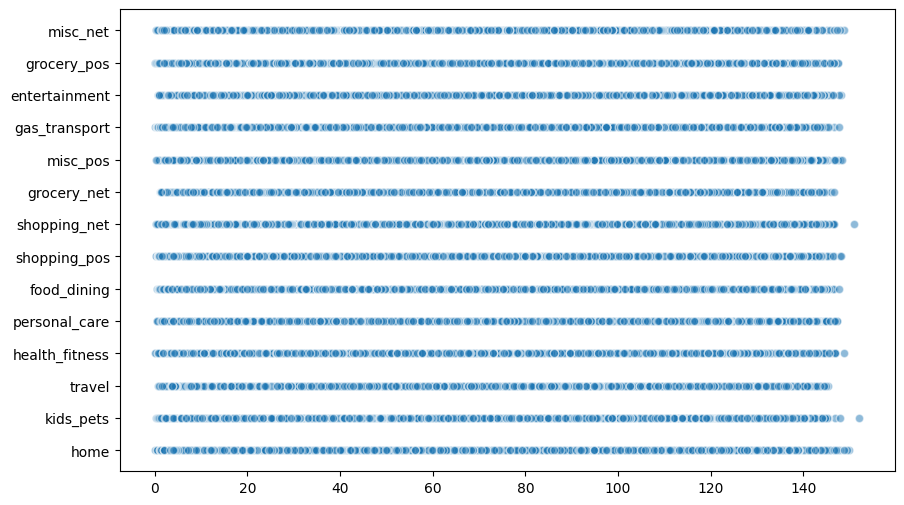

In [55]:
# prompt: scatter plot isfraud and not with respect distance and cTEGORY use 2 colours

plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='category', hue='is_fraud', data=df, palette=['sky blue', 'red'], alpha=0.5)
plt.title('Scatter Plot of Distance vs. Category, Colored by Fraud')
plt.xlabel('Distance (km)')
plt.ylabel('Category')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.show()

In [26]:
# prompt: count of is_fraud

print(df['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


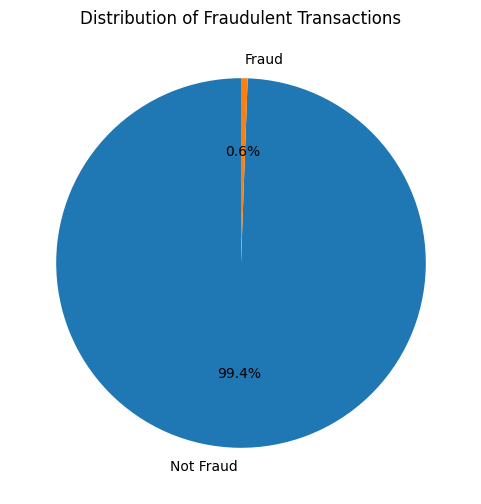

In [27]:
# prompt: pie chart of is_fraud with data lable

is_fraud_counts = df['is_fraud'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(is_fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

The output of the `value_counts()` function for the `is_fraud` column shows a highly imbalanced dataset, where:

- 1,289,169 transactions are legitimate (class 0)
- 7,506 transactions are fraudulent (class 1)

This indicates that only a very small percentage of the transactions are fraudulent. This class imbalance will likely pose a challenge for model training, as most machine learning algorithms are biased towards the majority class (legitimate transactions). As a result, the model may struggle to correctly identify fraudulent transactions, leading to poor detection and a high number of false negatives.


In [28]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1970-01-01 00:00:01.325376018,36.011293,-82.048315,0,2019-01-01
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1970-01-01 00:00:01.325376044,49.159047,-118.186462,0,2019-01-01
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1970-01-01 00:00:01.325376051,43.150704,-112.154481,0,2019-01-01
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1970-01-01 00:00:01.325376076,47.034331,-112.561071,0,2019-01-01
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1970-01-01 00:00:01.325376186,38.674999,-78.632459,0,2019-01-01


In [29]:
df_fraud = df[df['is_fraud'] == 1]

In [31]:
df_fraud.head(6)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1970-01-01 00:00:01.325466397,36.430124,-81.179483,1,2019-01-02
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1970-01-01 00:00:01.325468849,29.819364,-99.142791,1,2019-01-02
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1970-01-01 00:00:01.325473523,29.273085,-98.836360,1,2019-01-02
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1970-01-01 00:00:01.325475483,35.909292,-82.091010,1,2019-01-02
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1970-01-01 00:00:01.325476547,29.786426,-98.683410,1,2019-01-02
2937,2937,2019-01-02 13:38:08,4613314721966,fraud_Medhurst PLC,shopping_net,844.80,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.7266,885,Soil scientist,1988-09-15,248c2746e78f2ec713df51254ff1b302,1970-01-01 00:00:01.325511488,35.987802,-81.254332,1,2019-01-02


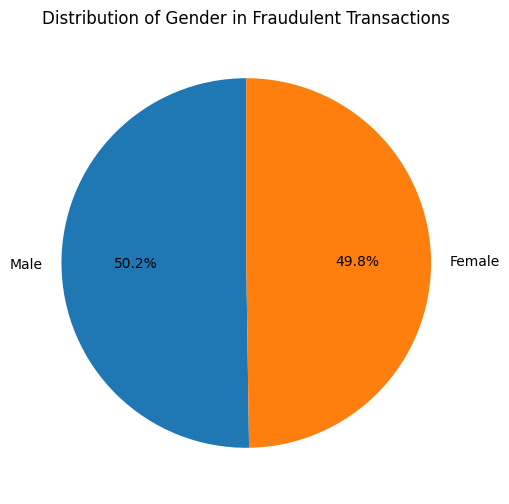

In [35]:
# prompt: data lable values male and female count pie chart of gender from df_fraud

gender_counts = df_fraud['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender in Fraudulent Transactions')
plt.show()

In [38]:
category_counts = df_fraud['category'].value_counts()
print("Categories and their counts in fraudulent transactions:")
category_counts

Categories and their counts in fraudulent transactions:


,count
category,
grocery_pos,1743
shopping_net,1713
misc_net,915
shopping_pos,843
gas_transport,618
misc_pos,250
kids_pets,239
entertainment,233
personal_care,220


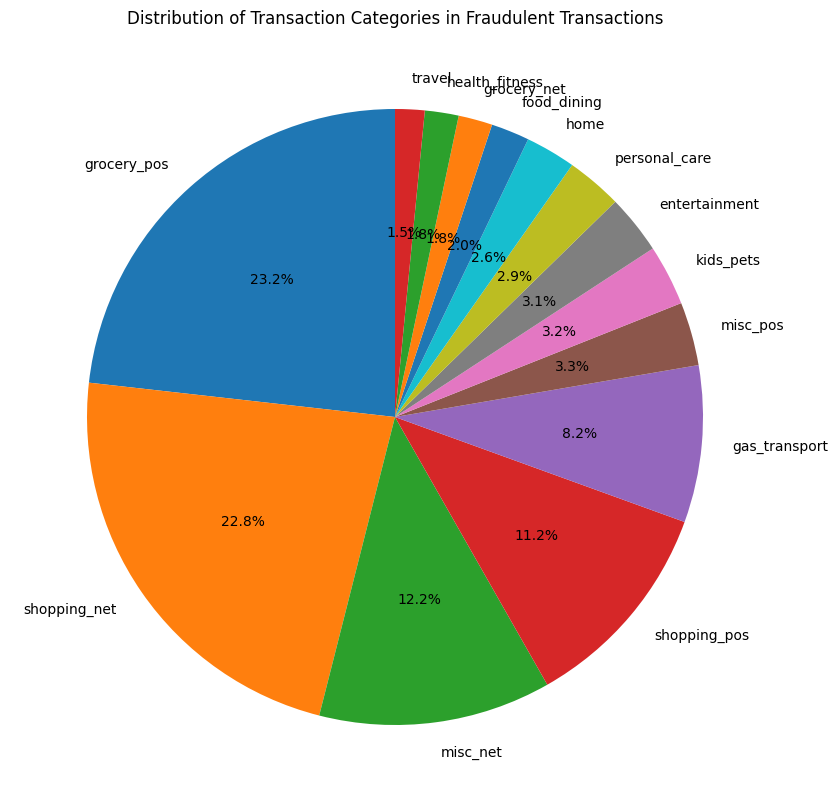

In [36]:
# prompt: pie chart of category with df_fraud

category_counts = df_fraud['category'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transaction Categories in Fraudulent Transactions')
plt.show()

## most of the farud happens in
- grocery_pos	1743
- shopping_net	1713
- misc_net	915
- shopping_pos	843
- gas_transport	618

In [39]:
# prompt: sum of amt

total_fraud_amount = df_fraud['amt'].sum()
print(f"Total amount of fraudulent transactions: ${total_fraud_amount:,.2f}")

Total amount of fraudulent transactions: $3,988,088.61


In [44]:
df_NoFraud = df[df['is_fraud'] == 0]

In [46]:
total_not_fraud_amount = df_NoFraud['amt'].sum()
print(f"Total amount of Non fraudulent transactions: ${total_not_fraud_amount:,.2f}")


Total amount of Non fraudulent transactions: $87,234,340.29


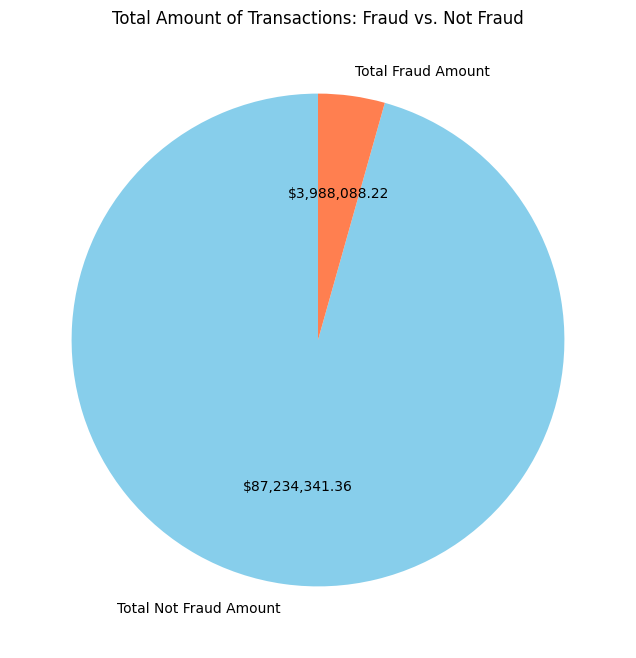

In [48]:
# prompt: pie chert total_not_fraud_amount and total_fraud_amount

total_fraud_amount = df_fraud['amt'].sum()
total_not_fraud_amount = df_NoFraud['amt'].sum()

amount_data = [total_not_fraud_amount, total_fraud_amount]
labels = ['Total Not Fraud Amount', 'Total Fraud Amount']
colors = ['skyblue', 'coral']

plt.figure(figsize=(8, 8))

# Display the pie chart with both percentage and actual values
plt.pie(amount_data, labels=labels, colors=colors, autopct=lambda p: f'${p/100.*sum(amount_data):,.2f}', startangle=90)

plt.title('Total Amount of Transactions: Fraud vs. Not Fraud')
plt.show()

- Total amount of Non fraudulent transactions: $87,234,340.29

- Total amount of fraudulent transactions: $3,988,088.61

